# Assignment 7

## Image compression using K-Means algorithm

In [2]:
import numpy as np
import skimage.io 
import math
import matplotlib.pyplot as plt

#### Function to initialise K random datapoints as centroids

In [3]:
def initCentroids(X, K):
    rand_index = np.random.permutation(np.shape(X)[0])
    centroids = X[rand_index[0:K], :]
    return centroids

#### Function to find the index of the closest centroid for each of the data points

In [4]:
def findClosestCentroids(X, centroids):
    K = np.shape(centroids)[0]
    m = np.shape(X)[0]
    closest_cen = np.zeros((m, 1))
    for i in range(0, m):
        small = math.inf
        for j in range(0, K):
            dist = X[i, :] - centroids[j, :]
            dist = np.multiply(dist, dist)
            dist = np.sum(dist)
            if dist < small:
                small = dist
                closest_cen[i, 0] = j 
    return closest_cen          

#### Function to find the centroids by calculating the mean of the positions of points in each cluster

In [5]:
def computeCentroids(X, closest_centroids, K):
    (m, n) = np.shape(X)
    centroids = np.zeros((K, n))
    for i in range(0, K):
        Ck = 0
        s = np.zeros((1, n))
        for j in range(0, m):
            if(closest_centroids[j, 0] == i):
                Ck = Ck + 1
                s = s + X[j, :]
        if(Ck != 0):
            centroids[i, :] = s / Ck
    return centroids        

### Image 1 : bird_small.png

#### Load 'bird_small.png' image and reshape to 2D

In [6]:
data1 = skimage.io.imread("bird_small.png")
data1 = data1/255
img_dim = np.shape(data1)
X1 = np.reshape(data1, (img_dim[0] * img_dim[1], 3))

#### Display 'bird_small.png' image

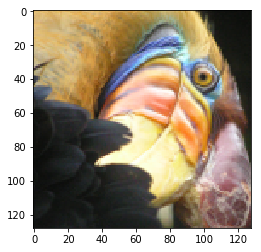

In [7]:
plt.imshow(data1)
plt.show()

#### Run K-Means algorithm

In [8]:
K = 16
num_iter = 10
centroids = initCentroids(X1, K)
(m, n) = np.shape(X1)
closest_centroids = np.zeros((m, 1))
for i in range(0, 10):
    closest_centroids = findClosestCentroids(X1, centroids)
    centroids = computeCentroids(X1, closest_centroids, K)

#### Recover the image back to original dimension

In [9]:
X1_recovered = np.zeros((m, n))
for i in range(0, m):
    X1_recovered[i, :] = centroids[closest_centroids.astype(np.int64)[i, 0], :]       
X1_recovered = np.reshape(X1_recovered, (img_dim[0], img_dim[1], 3))

#### Display compressed 'bird_small.png' image 

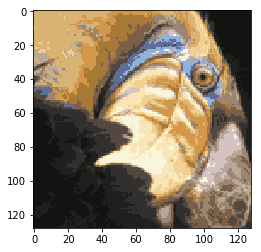

In [10]:
plt.imshow(X1_recovered)
plt.show()

### Image 2: tiger.jpg

#### Load 'tiger.jpg' image and reshape to 2D

In [11]:
data2 = skimage.io.imread("tiger.jpg")
data2 = data2/255
img_dim = np.shape(data2)
X2 = np.reshape(data2, (img_dim[0] * img_dim[1], 3))

#### Display 'tiger.jpg' image

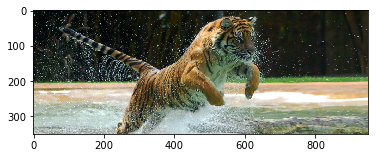

In [12]:
plt.imshow(data2)
plt.show()

#### Run K-Means algorithm

In [13]:
K = 16
num_iter = 10
centroids = initCentroids(X2, K)
(m, n) = np.shape(X2)
closest_centroids = np.zeros((m, 1))
for i in range(0, 5):
    closest_centroids = findClosestCentroids(X2, centroids)
    centroids = computeCentroids(X2, closest_centroids, K)


#### Recover the image back to original dimension

In [14]:
X2_recovered = np.zeros((m, n))
for i in range(0, m):
    X2_recovered[i, :] = centroids[closest_centroids.astype(np.int64)[i, 0], :]       
X2_recovered = np.reshape(X2_recovered, (img_dim[0], img_dim[1], 3))

#### Display compressed 'tiger.jpg' image

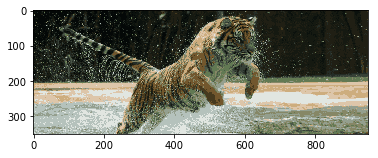

In [15]:
plt.imshow(X2_recovered)
plt.show()